In [141]:
import os
import math
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn
from matplotlib.pyplot import figure
from datetime import datetime, timedelta
from collections import OrderedDict

# <font color= purple> 0. Setup </font>
 -  <font color= blue> set working directory </font><br>
 -  <font color= blue> import data files </font>
     <br>
      1. <font color = blue> Kaoma precitipation data -</font> used in the analysis <br>
      2. <font color = blue> Kabwe temperature data -</font> used in the analysis <br>
      3. <font color = blue> Kasempa precipitation data -</font> analysed for comparision but excluded from the analysis <br>
      <br>
 -  <font color= blue> add datetime index </font>

In [142]:
os.chdir("C:/Users/q0hecjrk/Documents/_Data/Iolanda/")

# Datasets:
kaoma_df = pd.read_csv("Inputs/Precipitation_Kaoma.csv")
kabwe_df = pd.read_csv("Inputs/Temperature_Kabwe.csv")
kasempa_df = pd.read_csv("Inputs/Precipitation_Kasempa.csv")

kaoma_df['Date'] = pd.to_datetime(kaoma_df.Year.astype(str)+'-'+kaoma_df.Month.astype(str),format='%Y-%m')
kabwe_df['Date'] = pd.to_datetime(kabwe_df.Year.astype(str)+'-'+kabwe_df.Month.astype(str),format='%Y-%m')
kasempa_df['Date'] = pd.to_datetime(kasempa_df.Year.astype(str)+'-'+kasempa_df.Month.astype(str),format='%Y-%m')

kaoma_df.set_index('Date', inplace=True, drop=True, verify_integrity=True)
kabwe_df.set_index('Date', inplace=True, drop=True, verify_integrity=True)
kasempa_df.set_index('Date', inplace=True, drop=True, verify_integrity=True)

# <font color= purple> 1. Examine Input Data </font>
 -  <font color= blue> review dataframes -</font> Kaoma, Kasempa and Kabwe station dataframes <br>
 -  <font color= blue> review precipitation data </font>
     <br>
      1. <font color = blue> compare monthly precitipation data -</font> compare Kaoma and Kasempa station data <br>
      2. <font color = blue> compare annual precipitation data -</font> compare Kaoma and Kasempa station data <br>
     <br>
 -  <font color= blue> Kabwe temperature data -</font> review and visualize statistical properties of the data
 -  <font color= blue> Kaoma precipitation data -</font> review and visualize statistical properties of the data

In [143]:
kaoma_df.head()

,Year,Month,Season,Precipitation
Date,,,,
1961-01-01,1961,1,1,242.5
1961-02-01,1961,2,1,209.1
1961-03-01,1961,3,1,97.6
1961-04-01,1961,4,1,5.6
1961-05-01,1961,5,0,0.0


In [144]:
kasempa_df.head()

,Year,Month,Season,Precipitation
Date,,,,
1950-01-01,1950,1,1,293.1
1950-02-01,1950,2,1,97.8
1950-03-01,1950,3,1,108.4
1950-04-01,1950,4,1,0.0
1950-05-01,1950,5,0,0.0


In [145]:
kabwe_df.head()

,Month,Year,MaxTemp,MinTemp
Date,,,,
1980-01-01,1,1980,27.7,16.4
1980-04-01,4,1980,26.0,17.0
1980-05-01,5,1980,26.0,10.4
1980-06-01,6,1980,21.5,7.1
1980-07-01,7,1980,22.4,8.5


#### <font color= purple> Data availability analysis: </font>

In [146]:
#list of dates spanning the full data range
date_list = pd.date_range(kasempa_df.index.min(), kabwe_df.index.max(), freq='MS').strftime("%Y-%m").tolist()
date_list_df = pd.DataFrame(pd.to_datetime(date_list, format='%Y-%m'), columns=['Date'])
#merge Kasempa data
timeseries_df = date_list_df.merge(kasempa_df.drop(['Year', 'Month', 'Season'], axis=1), how='left', on='Date')
timeseries_df = timeseries_df.rename(columns = {'Precipitation':'Kasempa Precipitation'})
#merge Kaoma data
timeseries_df = timeseries_df.merge(kaoma_df.drop(['Year', 'Month', 'Season'], axis=1), how='left', on='Date')
timeseries_df = timeseries_df.rename(columns = {'Precipitation':'Kaoma Precipitation'})
#merge Kabwe data
timeseries_df = timeseries_df.merge(kabwe_df.drop(['Year', 'Month'], axis=1), how='left', on='Date')
#convert value columns to booleans (1 = contains data, 0 = missing data ~ NaN)
timeseries_dummy_df = timeseries_df.copy(deep = True)
timeseries_dummy_df['Kasempa Precipitation'] = np.where(timeseries_dummy_df['Kasempa Precipitation'].isnull(), np.nan, 4)
timeseries_dummy_df['Kaoma Precipitation'] = np.where(timeseries_dummy_df['Kaoma Precipitation'].isnull(), np.nan, 3)
timeseries_dummy_df['MaxTemp'] = np.where(timeseries_dummy_df['MaxTemp'].isnull(), np.nan, 2)
timeseries_dummy_df['MinTemp'] = np.where(timeseries_dummy_df['MinTemp'].isnull(), np.nan, 1)

timeseries_dummy_df.set_index('Date', inplace=True, drop=True, verify_integrity=True)

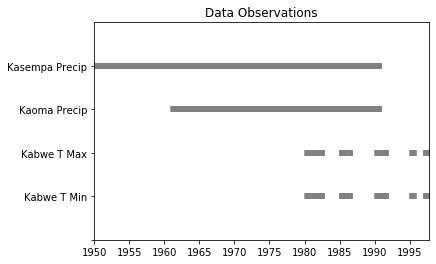

In [147]:
#Data availability plot
data_availability_figure = plt.figure()
data_availability_figure = plt.title('Data Observations')
data_availability_figure = plt.axis([timeseries_dummy_df.index.min(), timeseries_dummy_df.index.max(), 0, 5])
data_availability_figure = plt.yticks(np.arange(0, 5, 1.0), labels = ['', 'Kabwe T Min', 'Kabwe T Max', 'Kaoma Precip', 'Kasempa Precip'])
data_availability_figure = plt.scatter(timeseries_dummy_df.index, timeseries_dummy_df['Kasempa Precipitation'], marker = "|", c = 'grey')
data_availability_figure = plt.scatter(timeseries_dummy_df.index, timeseries_dummy_df['Kaoma Precipitation'], marker = "|", c = 'grey')
data_availability_figure = plt.scatter(timeseries_dummy_df.index, timeseries_dummy_df['MaxTemp'], marker = "|", c = 'grey')
data_availability_figure = plt.scatter(timeseries_dummy_df.index, timeseries_dummy_df['MinTemp'], marker = "|", c = 'grey')
data_availability_figure = plt.show()

## <font color = purple>Precipitation Data Comparison</font><br>
Precipitation data was collected from the 2 nearest NOAA guage stations (http://www.ncdc.noaa.gov/):
1. <font color = blue>Kaoma station - monthly data from January 1961 - December 1990 </font><br>
2. <font color = blue>Kasempa station - monthly data from January 1950 - December 1990 </font><br>
<br>
Ultimately the Kaoma guage data was selected for the analysis.

#### <font color = purple> Monthly Precipitation Data Analysis </font>

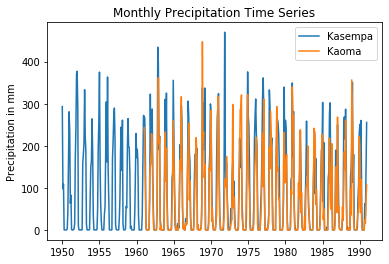

In [148]:
#Monthly timeseries plot
monthly_precip_timeseries_figure = plt.figure()
monthly_precip_timeseries_figure = plt.title('Monthly Precipitation Time Series')
monthly_precip_timeseries_figure = plt.ylabel("Precipitation in mm")
monthly_precip_timeseries_figure = plt.plot(kasempa_df.index, kasempa_df['Precipitation'], label = 'Kasempa')
monthly_precip_timeseries_figure = plt.plot(kaoma_df.index, kaoma_df['Precipitation'], label = 'Kaoma')
monthly_precip_timeseries_figure = plt.legend()
monthly_precip_timeseries_figure = plt.show()

In [149]:
#Overlapping monthly precipitation dataframe
kasempa_overlap_df = kasempa_df.loc[kaoma_df.index.min(): kaoma_df.index.max()]

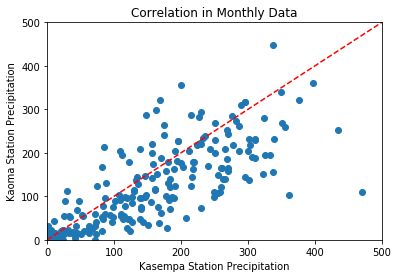

In [150]:
#Monthly precipitation correlation Plot
monthly_precip_correlation_figure = plt.figure()
monthly_precip_correlation_figure = plt.title('Correlation in Monthly Data')
monthly_precip_correlation_figure = plt.xlabel("Kasempa Station Precipitation")
monthly_precip_correlation_figure = plt.ylabel("Kaoma Station Precipitation")
monthly_precip_correlation_figure = plt.axis([0, 500, 0, 500])
monthly_precip_correlation_figure = plt.plot([0, 500], [0, 500], 'r--')
monthly_precip_correlation_figure = plt.scatter(kasempa_overlap_df['Precipitation'], kaoma_df['Precipitation'])
monthly_precip_correlation_figure = plt.show()

In [151]:
#Examining Monthly Pearson Correlation Coeffecient
combined_df = kasempa_overlap_df.copy(deep = True)
combined_df = combined_df.rename(columns = {'Precipitation':'Kasempa Precipitation'})
combined_df['Kaoma Precipitation'] = kaoma_df['Precipitation']
print(combined_df[['Kaoma Precipitation','Kasempa Precipitation']].corr())

                       Kaoma Precipitation  Kasempa Precipitation
Kaoma Precipitation               1.000000               0.867961
Kasempa Precipitation             0.867961               1.000000


#### <font color = purple> Annual Precipitation Data Analysis... </font>

In [152]:
#Annual Dataframes
kaoma_year_df = kaoma_df.drop(['Year', 'Month', 'Season'], axis = 1)
kasempa_year_df = kasempa_df.drop(['Year', 'Month', 'Season'], axis = 1)
kaoma_year_df = kaoma_year_df.resample("Y").sum()
kasempa_year_df = kasempa_year_df.resample("Y").sum()

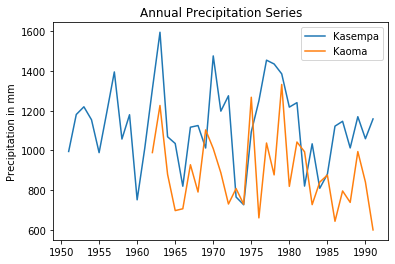

In [153]:
#Plotting Annual Timeseries
annual_precip_timeseries_figure = plt.figure()
annual_precip_timeseries_figure = plt.title("Annual Precipitation Series")
annual_precip_timeseries_figure = plt.ylabel("Precipitation in mm")
annual_precip_timeseries_figure = plt.plot(kasempa_year_df.index, kasempa_year_df['Precipitation'], label = 'Kasempa')
annual_precip_timeseries_figure = plt.plot(kaoma_year_df.index, kaoma_year_df['Precipitation'], label = 'Kaoma')
annual_precip_timeseries_figure = plt.legend()
annual_precip_timeseries_figure = plt.show()

In [154]:
#Overlapping annual precipitation dataframe
kasempa_overlap_year_df = kasempa_year_df.loc[kaoma_year_df.index.min(): kaoma_year_df.index.max()]

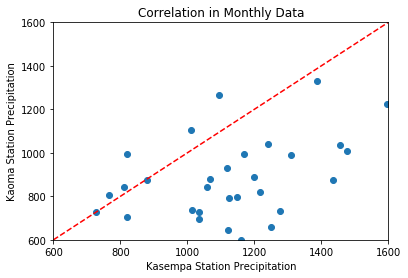

In [155]:
#Annual precipitation correlation plot
annual_precip_correlation_figure = plt.figure()
annual_precip_correlation_figure = plt.title('Correlation in Monthly Data')
annual_precip_correlation_figure = plt.xlabel("Kasempa Station Precipitation")
annual_precip_correlation_figure = plt.ylabel("Kaoma Station Precipitation")
annual_precip_correlation_figure = plt.axis([600, 1600, 600, 1600])
annual_precip_correlation_figure = plt.plot([600, 1600], [600, 1600], 'r--')
annual_precip_correlation_figure = plt.scatter(kasempa_overlap_year_df['Precipitation'], kaoma_year_df['Precipitation'])
annual_precip_correlation_figure = plt.show()

In [156]:
#Examining annual precipitation Pearson correlation coefficient
combined_year_df = kasempa_overlap_year_df.copy(deep = True)
combined_year_df = combined_year_df.rename(columns = {'Precipitation':'Kasempa Precipitation'})
combined_year_df['Kaoma Precipitation'] = kaoma_year_df['Precipitation']
print(combined_year_df[['Kaoma Precipitation','Kasempa Precipitation']].corr())

                       Kaoma Precipitation  Kasempa Precipitation
Kaoma Precipitation               1.000000               0.409918
Kasempa Precipitation             0.409918               1.000000


In [157]:
cov = statistics.stdev(kasempa_year_df['Precipitation'])/kasempa_year_df['Precipitation'].mean()
skew = kasempa_year_df['Precipitation'].skew()
print(kasempa_year_df.describe())
print('cov      '+str(cov))
print('skew     '+str(skew))

       Precipitation
count      41.000000
mean     1120.546341
std       205.468573
min       726.600000
25%      1012.300000
50%      1125.500000
75%      1219.900000
max      1595.300000
cov      0.18336463699761357
skew     0.040389687298101856


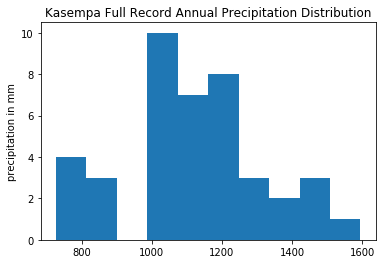

In [158]:
kasempa_annual_distribution_figure = plt.figure()
kasempa_annual_distribution_figure = plt.title('Kasempa Full Record Annual Precipitation Distribution')
kasempa_annual_distribution_figure = plt.ylabel('precipitation in mm')
kasempa_annual_distribution_figure = plt.hist(kasempa_year_df['Precipitation'])
kasempa_annual_distribution_figure = plt.show()

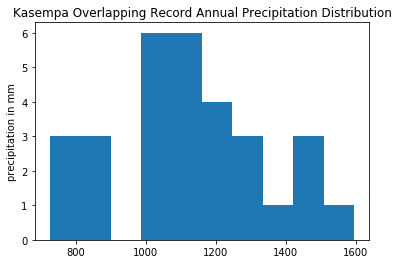

In [159]:
kasempa_overlap_annual_distribution_figure = plt.figure()
kasempa_overlap_annual_distribution_figure = plt.title('Kasempa Overlapping Record Annual Precipitation Distribution')
kasempa_overlap_annual_distribution_figure = plt.ylabel('precipitation in mm')
kasempa_overlap_annual_distribution_figure = plt.hist(kasempa_overlap_year_df['Precipitation'])
kasempa_overlap_annual_distribution_figure = plt.show()

In [160]:
cov = statistics.stdev(kaoma_year_df['Precipitation'])/kaoma_year_df['Precipitation'].mean()
skew = kaoma_year_df['Precipitation'].skew()
print(kaoma_year_df.describe())
print('cov      '+str(cov))
print('skew     '+str(skew))

       Precipitation
count      30.000000
mean      885.783333
std       185.172540
min       599.900000
25%       732.350000
50%       858.350000
75%       994.150000
max      1332.400000
cov      0.20904947453480896
skew     0.7503592957741662


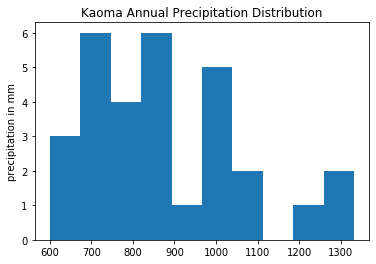

In [161]:
kaoma_annual_distribution_figure = plt.figure()
kaoma_annual_distribution_figure = plt.title('Kaoma Annual Precipitation Distribution')
kaoma_annual_distribution_figure = plt.ylabel('precipitation in mm')
kaoma_annual_distribution_figure = plt.hist(kaoma_year_df['Precipitation'])
kaoma_annual_distribution_figure = plt.show()

#### <font color = purple>Notes:</font>
1. <font color = blue>The Kasempa station recieves more precepitation. 
2. <font color = blue>The monthly data are strongly correlated, however the annual data are not.

## <font color = purple> Temperature Data Analysis </font>
1. <font color = blue>Visualization of temperature data
2. <font color = blue>Comparision to precipitation data

In [162]:
#Monthly temperature lists
kabwe_mintemp_monthly_lists = kabwe_df.groupby('Month')['MinTemp'].apply(list)
kabwe_maxtemp_monthly_lists = kabwe_df.groupby('Month')['MaxTemp'].apply(list)

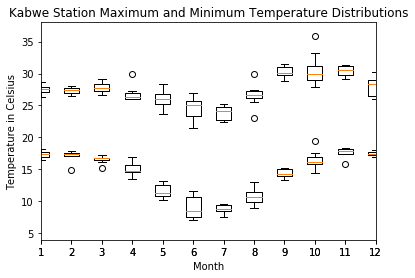

In [163]:
#Kabwe temperature distribution plot
kabwe_temp_distribution_figure = plt.figure()
kabwe_temp_distribution_figure = plt.title('Kabwe Station Maximum and Minimum Temperature Distributions')
kabwe_temp_distribution_figure = plt.xlabel('Month')
kabwe_temp_distribution_figure = plt.ylabel('Temperature in Celsius')
kabwe_temp_distribution_figure = plt.boxplot(kabwe_mintemp_monthly_lists)
kabwe_temp_distribution_figure = plt.boxplot(kabwe_maxtemp_monthly_lists)
kabwe_temp_distribution_figure = plt.axis([1, 12, 4, 38])
kabwe_temp_distribution_figure = plt.show()

In [164]:
#Monthly precipitation distribution lists
kaoma_monthly_dfs = kaoma_df.groupby('Month')['Precipitation'].apply(list)
kasempa_monthly_dfs = kasempa_df.groupby('Month')['Precipitation'].apply(list)

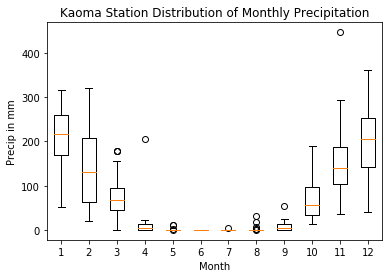

In [165]:
# Kaoma precipitation distribution plot
kaoma_precip_distribution_figure = plt.figure()
kaoma_precip_distribution_figure = plt.title('Kaoma Station Distribution of Monthly Precipitation')
kaoma_precip_distribution_figure = plt.xlabel('Month')
kaoma_precip_distribution_figure = plt.ylabel('Precip in mm')
kaoma_precip_distribution_figure = plt.boxplot(kaoma_monthly_dfs);
kaoma_precip_distribution_figure = plt.show()

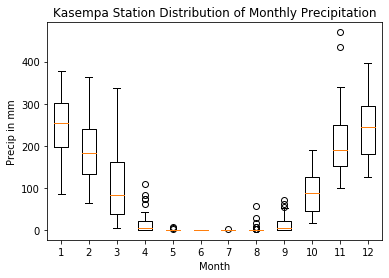

In [166]:
#Kasempa precipitation distribution plot
kasempa_precip_distribution_figure = plt.figure()
kasempa_precip_distribution_figure = plt.title('Kasempa Station Distribution of Monthly Precipitation')
kasempa_precip_distribution_figure = plt.xlabel('Month')
kasempa_precip_distribution_figure = plt.ylabel('Precip in mm')
kasempa_precip_distribution_figure = plt.boxplot(kasempa_monthly_dfs);

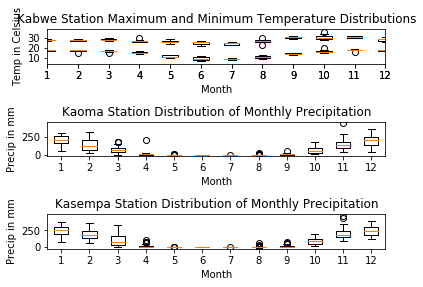

In [167]:
# Kabwe Temperature Plot
matplotlib.pyplot.subplot(3, 1, 1)
matplotlib.pyplot.title('Kabwe Station Maximum and Minimum Temperature Distributions')
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Temp in Celsius')
kabwe_mintemp_monthly_lists = kabwe_df.groupby('Month')['MinTemp'].apply(list)
kabwe_maxtemp_monthly_lists = kabwe_df.groupby('Month')['MaxTemp'].apply(list)
matplotlib.pyplot.boxplot(kabwe_mintemp_monthly_lists)
matplotlib.pyplot.boxplot(kabwe_maxtemp_monthly_lists)
matplotlib.pyplot.axis([1, 12, 4, 38])

# Kaoma Temperature Plot
matplotlib.pyplot.subplot(3, 1, 2)
matplotlib.pyplot.title('Kaoma Station Distribution of Monthly Precipitation')
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Precip in mm')
kaoma_monthly_dfs = kaoma_df.groupby('Month')['Precipitation'].apply(list)
matplotlib.pyplot.boxplot(kaoma_monthly_dfs);

# Kasempa Temperature Plot
matplotlib.pyplot.subplot(3, 1, 3)
matplotlib.pyplot.title('Kasempa Station Distribution of Monthly Precipitation')
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Precip in mm')
kasempa_monthly_dfs = kasempa_df.groupby('Month')['Precipitation'].apply(list)
matplotlib.pyplot.boxplot(kasempa_monthly_dfs);
#the command below should allow them to all plot in the same figure at normal size but it isn't...
#figure(figsize=(100, 100))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [168]:
timeseries_df.head()
print(timeseries_df[['Kaoma Precipitation','Kasempa Precipitation','MaxTemp','MinTemp']].corr())

                       Kaoma Precipitation  Kasempa Precipitation   MaxTemp  \
Kaoma Precipitation               1.000000               0.867961  0.244924   
Kasempa Precipitation             0.867961               1.000000  0.330312   
MaxTemp                           0.244924               0.330312  1.000000   
MinTemp                           0.615822               0.711987  0.697056   

                        MinTemp  
Kaoma Precipitation    0.615822  
Kasempa Precipitation  0.711987  
MaxTemp                0.697056  
MinTemp                1.000000  


#### <font color = purple>Notes:</font>
1. <font color = blue>Temperature is not obviously more correlated with one precipitation dataset or the other
     - Kaoma-MinTemp: 0.61 and Kasempa-MinTemp: 0.71 
     - Kaoma-MaxTemp: 0.24 and Kasempa-MaxTemp: 0.33
     - The correlation between Max and Min Temp is 0.69 

# <font color= purple> 2. Generate Baseline Trace Data </font>
 -  <font color= blue> bootstrap trace dates -</font> stratified by month <br>
 -  <font color= blue> match trace dates to precipitation -</font> using Kaoma precipitation values <br>
 -  <font color= blue> match trace dates to temperature -</font> using Kabwe temperature values<br>
      1. <font color = blue> by date -</font> else <br>
      2. <font color = blue> by month and precipitation strata -</font> else <br>
      3. <font color = blue> by month alone -</font> else <br>
      4. <font color = blue> by precipitation strata alone -</font> else <br>
      5. <font color = blue> at random -</font> should not happen <br>

Below we develop 1,000 years of bootstrapped monthly precipitation data, stratified by month. This data is contained in a single 1,000 year long synthetic traces.

## <font color = purple> Bootstrap Trace Data </font>
 - <font color = blue> single monthly trace of n years </font> <br>
 - <font color = blue> stratified by month </font>

In [169]:
#Bootstrap method 
def boostrap(df, sample_df):
    #df is a pandas dataframe it must have the following columns: 'strata'
    #sample_df is a pandas dataframe it must have the following column: 'strata'
    stratalists = df.groupby('strata')['Date'].apply(list)
    sample_df['trace'] = -999
    for index, row in sample_df.iterrows():
        sublist = stratalists[row['strata']]
        selected_date = sublist[int(random.random() / (1 / len(sublist)))]
        sample_df.loc[index, 'trace'] = pd.to_datetime(selected_date, format='%Y-%m').date() 
    return sample_df

#### <font color = purple> Input trace time series </font>

In [182]:
#Generate sample_df input for bootstrap method - 100 years of monthly data per trace
sample_list = list(range(1, 13, 1))
# second value in range determines number of years in trace
for i in range(1, 1, 1):
    sample_list.extend(list(range(1, 13, 1)))
sample_df = pd.DataFrame(sample_list, columns = ['strata'])

#### <font color = purple> Input observed times series from which to bootstrap </font>

In [171]:
#Format df input for bootstrap method
df = kaoma_df.copy(deep=True)
df['Date'] = df.index
df = df.rename(columns = {'Month':'strata'})

#### <font color = purple> Run bootstrap function </font>

In [172]:
trace_dates_df = boostrap(df, sample_df)
trace_dates_df = trace_dates_df.rename(columns = {'trace':'Date'})
trace_dates_df['Date'] = pd.to_datetime(trace_dates_df['Date'], format='%Y-%m')

## <font color = purple> Match Trace Data to Existing Precipitation and Temperature Records </font>
 - <font color = blue> by date
 - <font color = blue> by month and/or precipitation strata

In [173]:
trace_dates_df = trace_dates_df.merge(timeseries_df, how='left', on='Date')
trace_dates_df.head()

,strata,Date,Kasempa Precipitation,Kaoma Precipitation,MaxTemp,MinTemp
0,1,1962-01-01,250.4,228.8,NaN,NaN
1,2,1977-02-01,288.9,310.8,NaN,NaN
2,3,1975-03-01,155.5,86.3,NaN,NaN
3,4,1988-04-01,1.0,1.1,NaN,NaN
4,5,1966-05-01,4.8,11.0,NaN,NaN


#### <font color = purple> Add precipitation strata to dataframes </font>

In [183]:
trace_dates_df['Kaoma Precip Strata'] = np.nan
for index, row in trace_dates_df.iterrows():
    trace_dates_df.loc[index, 'Kaoma Precip Strata'] = math.floor(row['Kaoma Precipitation'] / 10) * 10

In [184]:
timeseries_kabwe_period_df = timeseries_df.copy(deep = True)
timeseries_kabwe_period_df.set_index('Date', inplace=True, drop=True, verify_integrity=True)
timeseries_kabwe_period_df = timeseries_kabwe_period_df.loc[kabwe_df.index.min(): kabwe_df.index.max()]
timeseries_kabwe_period_df.dropna(inplace=True)
timeseries_kabwe_period_df['Kaoma Precip Strata'] = np.nan
for index, row in timeseries_kabwe_period_df.iterrows():
    timeseries_kabwe_period_df.loc[index, 'Kaoma Precip Strata'] = math.floor(row['Kaoma Precipitation'] / 10) * 10

#### <font color = purple> Insert temperature data by month and/or precipitation strata </font> <br>
<font color = blue> The temperature and precipitation data do NOT overlap completely in time or space. </font> <br>
 - the Kaoma precipitation data was recorded from January 1960 - December 1990. <br>
 - the temperature data was collected from the Kabwe station approximately 400 km to the East. <br>
 - the Kabwe station data contained records as far back as 1973, but the timeseries is irregular (missing values) <br>
 - only the Kabwe data from period between January 1980 and December 1997 were used in this analysis. <br>
<br>
<font color = blue> If bootstrapped date contained a precipitation record but no temperature record </font>
 - the precipitation value was rounded down toward the lower 10s place. 
 - this effectively places each synthetic precipitation value in a 10 mm wide bin
 - this precipitation bin along with the synthetic record mon are used as stratification criteria
 - from these strata temperature records are selected through bootstrapping<br> 
This allows for the full observed precipitation record (~1960 - 1990) to be used, even though the temperature records must be selected from the shorter 10 year period (~1980 - 1990) over which the precipitation and temperature records overlap. 

In [186]:
for index, row in trace_dates_df.iterrows():
    if row['MaxTemp' == np.nan] or row['MinTemp' == np.nan]:
        month_strata_df = timeseries_kabwe_period_df.loc[timeseries_kabwe_period_df.index.month == row['strata']]
        if month_strata_df.empty:
            precip_strata_df = timeseries_kabwe_period_df.loc[timeseries_kabwe_period_df['Kaoma Precip Strata'] == row['Kaoma Precip Strata']]
            if precip_strata_df.empty:
                sample = timeseries_kabwe_period_df.sample(n = 1)
                trace_dates_df.at[index,'MaxTemp'] = sample['MaxTemp']
                trace_dates_df.at[index,'MinTemp'] = sample['MinTemp']
            else:
                sample = precip_strata_df.sample(n = 1)
                trace_dates_df.at[index,'MaxTemp'] = sample['MaxTemp']
                trace_dates_df.at[index,'MinTemp'] = sample['MinTemp']
        else:
            precip_strata_df = month_strata_df.loc[month_strata_df['Kaoma Precip Strata'] == row['Kaoma Precip Strata']]
            if precip_strata_df.empty:
                sample = month_strata_df.sample(n = 1)
                trace_dates_df.at[index,'MaxTemp'] = sample['MaxTemp']
                trace_dates_df.at[index,'MinTemp'] = sample['MinTemp']
            else:
                sample = precip_strata_df.sample(n = 1)
                trace_dates_df.at[index,'MaxTemp'] = sample['MaxTemp']
                trace_dates_df.at[index,'MinTemp'] = sample['MinTemp']
trace_dates_df.head()

,strata,Date,Kasempa Precipitation,Kaoma Precipitation,MaxTemp,MinTemp,Kaoma Precip Strata
0,1,1962-01-01,250.4,228.8,26.3,17.8,220.0
1,2,1977-02-01,288.9,310.8,27.6,17.5,310.0
2,3,1975-03-01,155.5,86.3,28.0,15.3,80.0
3,4,1988-04-01,1.0,1.1,26.0,17.0,0.0
4,5,1966-05-01,4.8,11.0,26.0,10.4,10.0
